# All human paired EDA

.open /ibmm_data2/oas_database/OAS.db  
ALTER TABLE all_human_paired ADD COLUMN sequence_alignment_aa_full TEXT;  
UPDATE all_human_paired  
SET sequence_alignment_aa_full = sequence_alignment_aa_heavy || sequence_alignment_aa_light;  
.mode csv  
.output /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt  
SELECT sequence_id_heavy_light, sequence_alignment_aa_heavy, sequence_alignment_aa_light, sequence_alignment_aa_full FROM all_human_paired;  
.output stdout  
.quit  

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import csv

In [5]:
filename = '/ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_cdr3_aa.txt'
cdr3_heavy_aa = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row) > 1:  # Make sure there's at least two columns
            cdr3_heavy_aa.append(row[1])  # Append the second column value


In [4]:
print(cdr3_heavy_aa[:10])

['ARDVGPYNSISPGRYYFDY', 'ARMARDGYVLRDWYFDL', 'ARGRLIWSADYTGGDYFDP', 'ARVASNAPTD', 'ARLFDPFVNDYSPGTGYGWLDP', 'ARHNRYNQRNPFDL', 'ARTALITYSYGEGRAFFDY', 'ARLIYTGYGKRCFDY', 'ARDDDGSNQYGIFEY', 'ARTRFSVETYYYNGMDV']


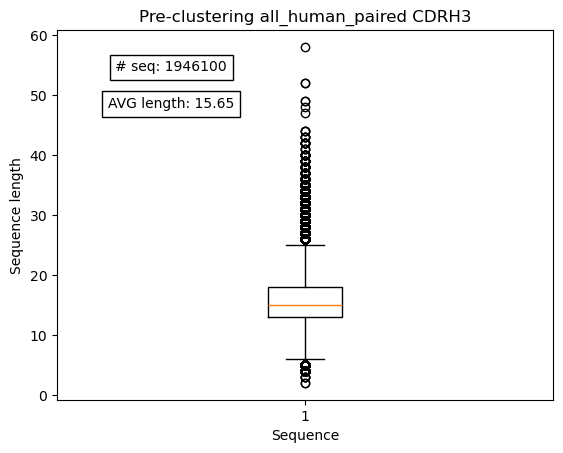

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pre-clustering all_human_paired CDRH3')

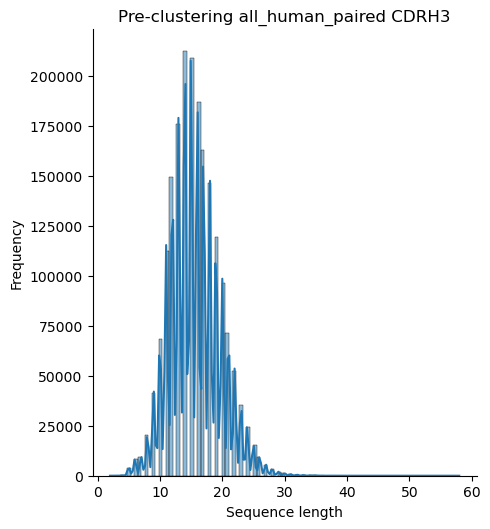

In [7]:
# Calculate lengths from the extracted column
cdr3_aa_heavy_len = [len(str(x)) for x in cdr3_heavy_aa]

# Boxplot
plt.boxplot(cdr3_aa_heavy_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('Pre-clustering all_human_paired CDRH3')
text = f'# seq: {len(cdr3_heavy_aa)}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {round(statistics.mean(cdr3_aa_heavy_len), 2)}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

# Distribution plot
sns.displot(cdr3_aa_heavy_len, kde=True, bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Pre-clustering all_human_paired CDRH3')


In [3]:
filename = '/ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt'
full_seq_aa = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row) > 1:  # Make sure there's at least two columns
            full_seq_aa.append(row[3])  # extract full sequence (heavy and light, 4. column in txt file)

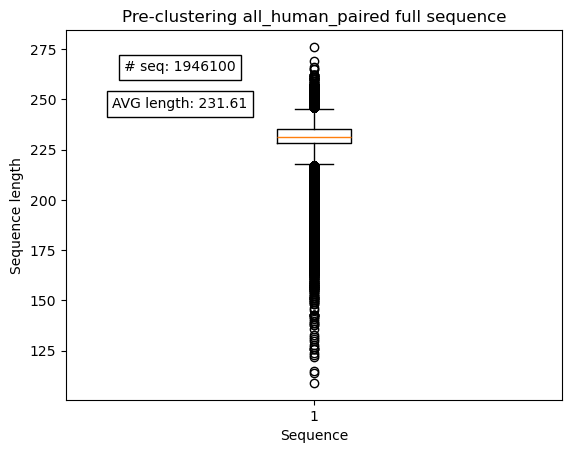

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pre-clustering all_human_paired full sequence')

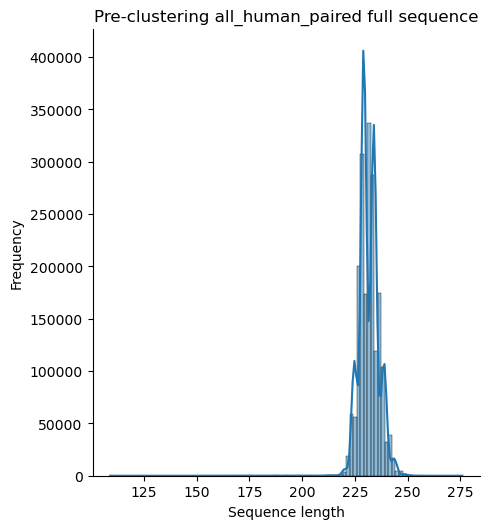

In [4]:
# Calculate lengths from the extracted column
full_seq_aa_len = [len(str(x)) for x in full_seq_aa]

# Boxplot
plt.boxplot(full_seq_aa_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('Pre-clustering all_human_paired full sequence')
text = f'# seq: {len(full_seq_aa)}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {round(statistics.mean(full_seq_aa_len), 2)}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

# Distribution plot
sns.displot(full_seq_aa_len, kde=True, bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Pre-clustering all_human_paired full sequence')

In [5]:
# heavy aa sequence

filename = '/ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt'
heavy_seq_aa = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row) > 1:  # Make sure there's at least two columns
            heavy_seq_aa.append(row[1])  # extract heavy aa sequence (2. column in txt file)

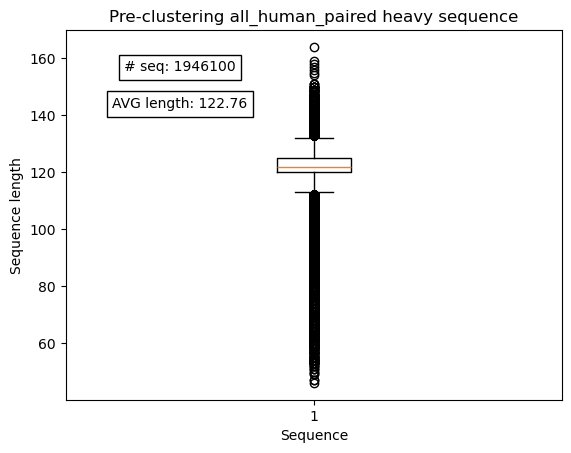

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pre-clustering all_human_paired heavy sequence')

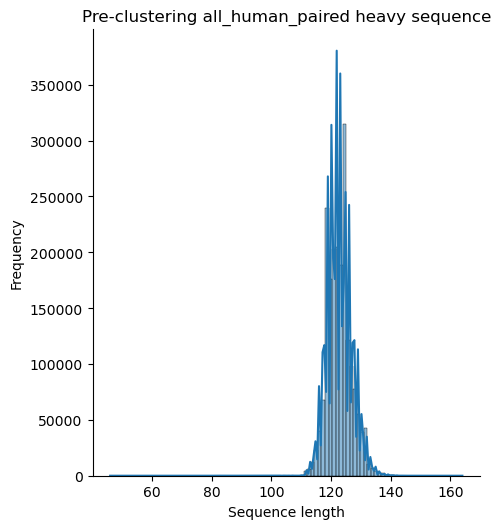

In [6]:
# Calculate lengths from the extracted column
heavy_seq_aa_len = [len(str(x)) for x in heavy_seq_aa]

# Boxplot
plt.boxplot(heavy_seq_aa_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('Pre-clustering all_human_paired heavy sequence')
text = f'# seq: {len(heavy_seq_aa)}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {round(statistics.mean(heavy_seq_aa_len), 2)}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

# Distribution plot
sns.displot(heavy_seq_aa_len, kde=True, bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Pre-clustering all_human_paired heavy sequence')

In [7]:
# light aa sequence

filename = '/ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt'
light_seq_aa = []

with open(filename, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        if len(row) > 1:  # Make sure there's at least two columns
            light_seq_aa.append(row[2])  # extract light aa sequence (3. column in txt file)

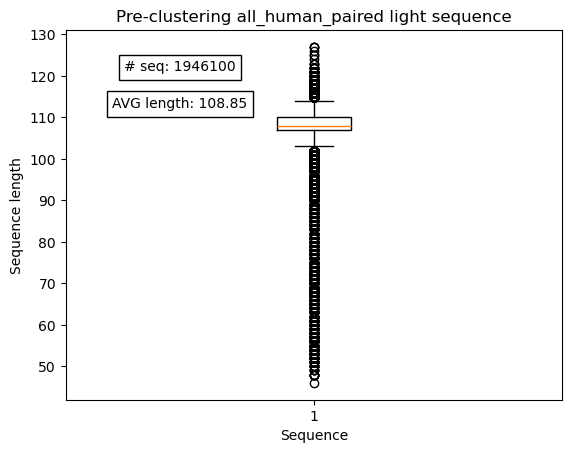

/home/leab/anaconda3/envs/OAS_paired_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Pre-clustering all_human_paired light sequence')

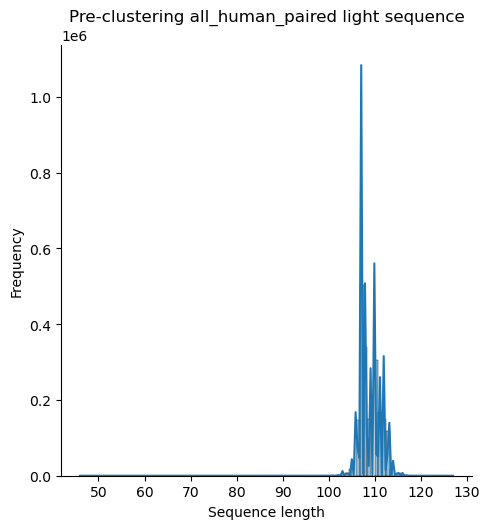

In [8]:
# Calculate lengths from the extracted column
light_seq_aa_len = [len(str(x)) for x in light_seq_aa]

# Boxplot
plt.boxplot(light_seq_aa_len)
plt.ylabel('Sequence length')
plt.xlabel('Sequence')
plt.title('Pre-clustering all_human_paired light sequence')
text = f'# seq: {len(light_seq_aa)}'
plt.text(0.23, 0.9, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
text = f'AVG length: {round(statistics.mean(light_seq_aa_len), 2)}'
plt.text(0.23, 0.80, text, transform=plt.gca().transAxes, ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

# Distribution plot
sns.displot(light_seq_aa_len, kde=True, bins=100)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Pre-clustering all_human_paired light sequence')

In [9]:
# Path to your exported .txt file
txt_file_path = '/ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt'

# Dictionary to count occurrences of each sequence_alignment_aa_full
sequence_counts = {}

# Open and read the .txt file
with open(txt_file_path, mode='r') as file:
    reader = csv.reader(file)  # Use csv.reader since there are no column headers
    for row in reader:
        # sequence_alignment_aa_full is the fourth column (index 3)
        sequence = row[3] 
        if sequence in sequence_counts:
            sequence_counts[sequence] += 1
        else:
            sequence_counts[sequence] = 1

# Filter the sequence_counts to find duplicates
duplicates = {sequence: count for sequence, count in sequence_counts.items() if count > 1}

# Print the number of unique duplicate sequences
num_duplicates = len(duplicates)
print(f"Number of unique duplicate sequences in the sequence_alignment_aa_full column: {num_duplicates}")

Number of unique duplicate sequences in the sequence_alignment_aa_full column: 71120


In [ ]:
# Remove duplicates:
# awk -F ',' '!seen[$4]++' /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq.txt > /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq_no_duplicates.txt

# Create fasta file
# awk -F, '{print ">" $1 "\n" $NF}' /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_cdr3_aa.txt > /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_cdr3_aa.fasta

# awk -F, '{print ">" $1 "\n" $NF}' /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq_no_duplicates.txt > /ibmm_data2/oas_database/paired_lea_tmp/txt_files_oas_db/all_human_paired_full_aa_seq_no_duplicates.fasta